# 手法の比較

In [1]:
# 必要なモジュールをimport
from random import randint

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

np.random.seed(1)  # 乱数を固定
np.set_printoptions(precision=4)  # 表示する桁数の設定

%matplotlib inline

## ポイント
- 決定境界を可視化することにより、手法ごとの違いをみる(細かい数学はやらない)

In [2]:
# 決定境界 と データセット を可視化する関数群
def plot_decision_boundary(classifier, X, y):
    x1 = np.linspace(X[:, 0].min() - 1.0,
                     X[:, 0].max() + 1.0,
                     num=100)
    x2 = np.linspace(X[:, 1].min() - 1.0,
                     X[:, 1].max() + 1.0,
                     num=100)

    x1, x2 = np.meshgrid(x1, x2)

    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = classifier.predict(X_new).reshape(100, 100)

    plt.contourf(x1, x2, y_pred, alpha=.2, cmap="spring")


def plot_data(X, y):
    plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0])
    plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1])

## データセット

In [3]:
from sklearn.datasets import make_moons

moons = make_moons(n_samples=100, noise=0.2)

In [4]:
X = moons[0]
y = moons[1]

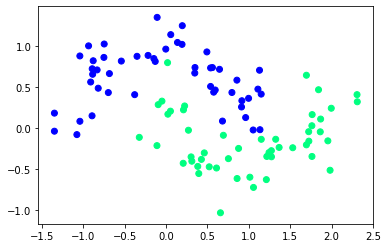

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="winter")

## データセットの分割

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# ロジスティック回帰
- 線形モデル
    - 分離平面が直線になる

In [7]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)


print(logistic_regression.score(X_train, y_train))
print(logistic_regression.score(X_test, y_test))

0.8666666666666667
0.88


/Users/mohira/src/github.com/mohira/ml-materials/.venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


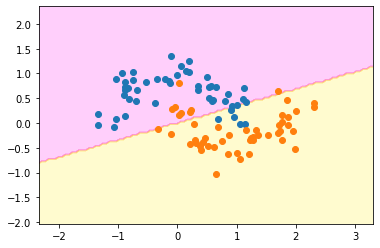

In [8]:
plot_decision_boundary(logistic_regression, X, y)

plot_data(X, y)

plt.show()

# SVM
- 非線形なモデル
    - 分離平面が曲線になる

In [9]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))

0.92
0.92


/Users/mohira/src/github.com/mohira/ml-materials/.venv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


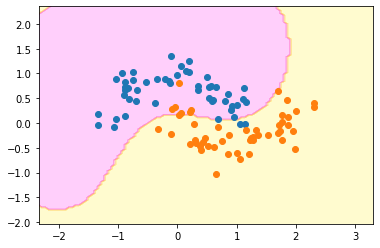

In [10]:
plot_decision_boundary(svm, X, y)

plot_data(X, y)

plt.show()

# kNN

## k = 1

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn1 = KNeighborsClassifier(n_neighbors=1)

knn1.fit(X_train, y_train)

print(knn1.score(X_train, y_train))
print(knn1.score(X_test, y_test))

1.0
0.96


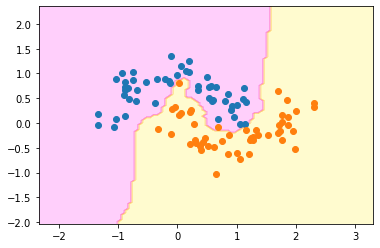

In [12]:
plot_decision_boundary(knn1, X, y)

plot_data(X, y)

plt.show()

## k = 5

In [13]:
knn2 = KNeighborsClassifier(n_neighbors=5)

knn2.fit(X_train, y_train)

print(knn2.score(X_train, y_train))
print(knn2.score(X_test, y_test))

0.9866666666666667
0.92


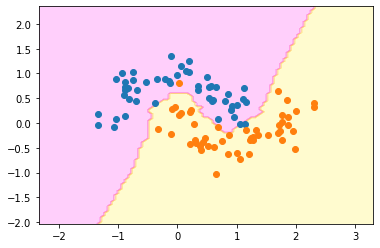

In [14]:
plot_decision_boundary(knn2, X, y)

plot_data(X, y)

plt.show()

# 決定木

## その1

In [15]:
from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier()

tree1.fit(X_train, y_train)

print(tree1.score(X_test, y_test))

0.96


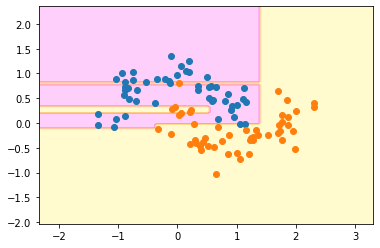

In [16]:
plot_decision_boundary(tree1, X, y)

plot_data(X, y)

plt.show()

## その2

In [17]:
tree2 = DecisionTreeClassifier(max_depth=10)

tree2.fit(X_train, y_train)

print(tree2.score(X_test, y_test))

0.96


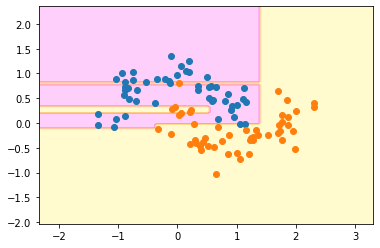

In [18]:
plot_decision_boundary(tree2, X, y)

plot_data(X, y)

plt.show()

## 決定木を可視化する

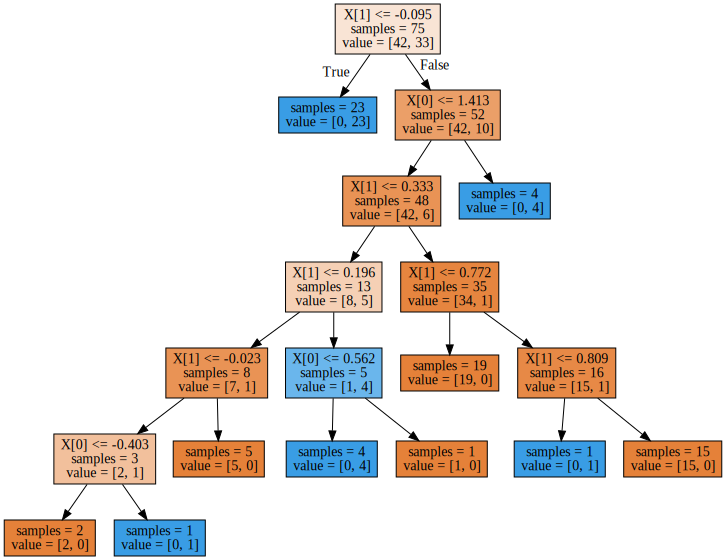

In [19]:
from sklearn.tree import export_graphviz

import graphviz

export_graphviz(tree1,
                out_file="tree1.dot",
                impurity=False, filled=True)


with open("tree1.dot") as f:
    graph = f.read()

graphviz.Source(graph)

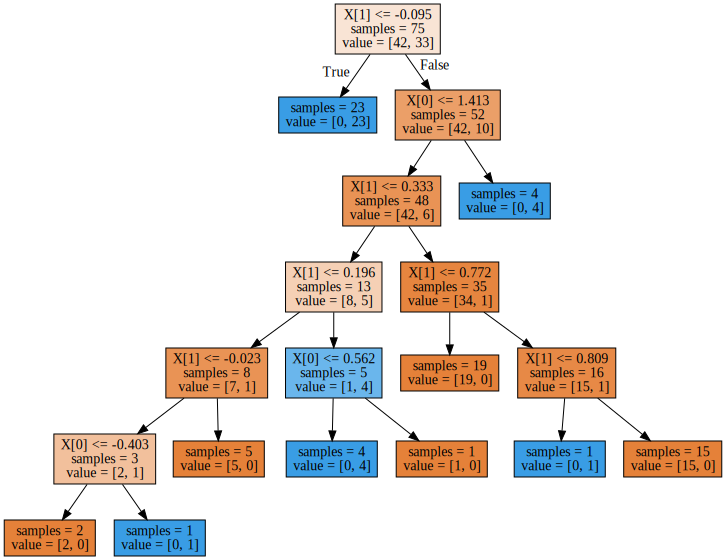

In [20]:
export_graphviz(tree2,
                out_file="tree2.dot",
                impurity=False, filled=True)


with open("tree2.dot") as f:
    graph = f.read()

graphviz.Source(graph)

## 特徴量の重要度

In [21]:
tree1.feature_importances_

array([0.2323, 0.7677])

In [22]:
tree2.feature_importances_

array([0.2323, 0.7677])

## 特徴量の重要度を可視化

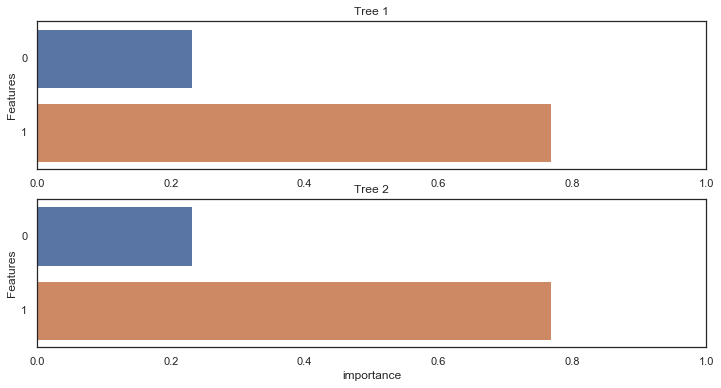

In [23]:
sns.set(style='white', context='notebook', palette='deep')

fig, axes = plt.subplots(2, 1, figsize=(12, 6))

g1 = sns.barplot(x=tree1.feature_importances_,
                 y=[0, 1],
                 orient="h",
                 ax=axes[0])

g1.set_ylabel("Features")
g1.set_title("Tree 1")
g1.set_xlim(0, 1)


g2 = sns.barplot(x=tree2.feature_importances_,
                 y=[0, 1],
                 orient="h",
                 ax=axes[1])


g2.set_xlabel("importance")
g2.set_ylabel("Features")
g2.set_title("Tree 2")
g2.set_xlim(0, 1)

plt.show()

## ガンのデータセットを使って特徴量の重要度をみる

### データの準備

In [24]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### 学習

In [25]:
cancer_tree = DecisionTreeClassifier()

cancer_tree.fit(X_train, y_train)

print(cancer_tree.score(X_train, y_train))
print(cancer_tree.score(X_test, y_test))

1.0
0.951048951048951


### 特徴量の重要度

In [26]:
cancer_tree.feature_importances_

array([0.    , 0.0344, 0.    , 0.    , 0.    , 0.    , 0.    , 0.6959,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.0128, 0.0016, 0.    ,
       0.    , 0.017 , 0.    , 0.0067, 0.059 , 0.0995, 0.    , 0.0633,
       0.0099, 0.    , 0.    , 0.    , 0.    , 0.    ])

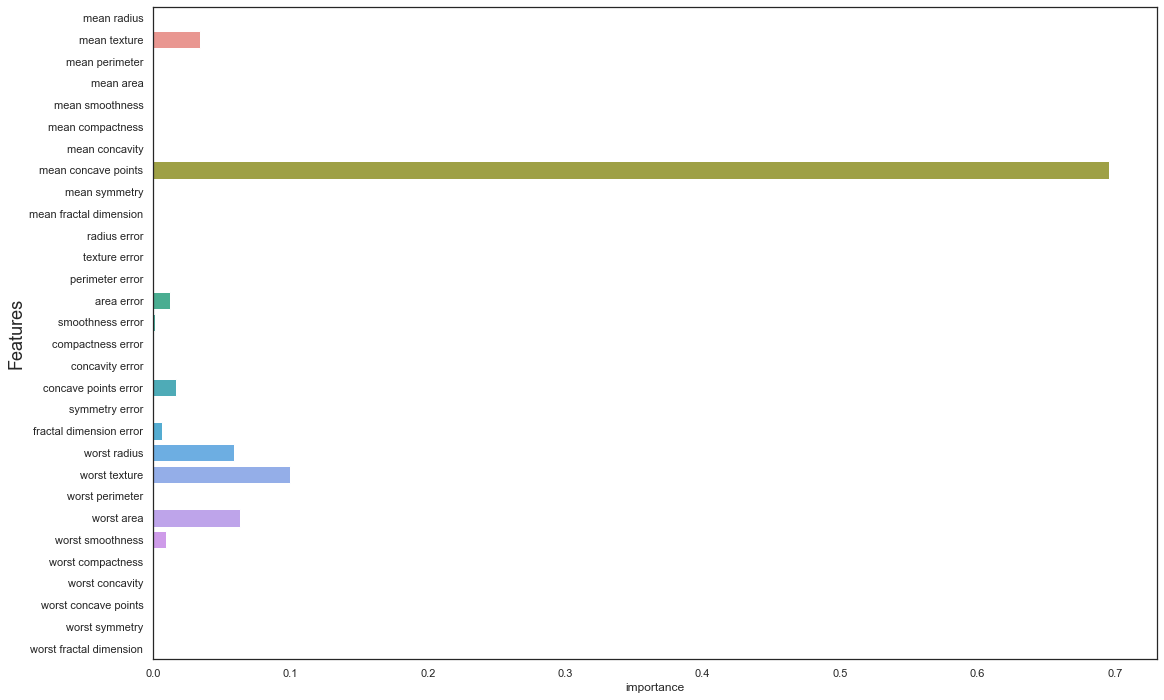

In [27]:
# 特徴量の重要度を可視化

plt.figure(figsize=(18, 12))
g = sns.barplot(x=cancer_tree.feature_importances_,
                y=cancer.feature_names,
                orient="h"
                )

g.set_xlabel("importance", fontsize=12)
g.set_ylabel("Features", fontsize=18)

plt.show()

#### 観察
- 重要な特徴量を知ることができる

### 決定木の可視化

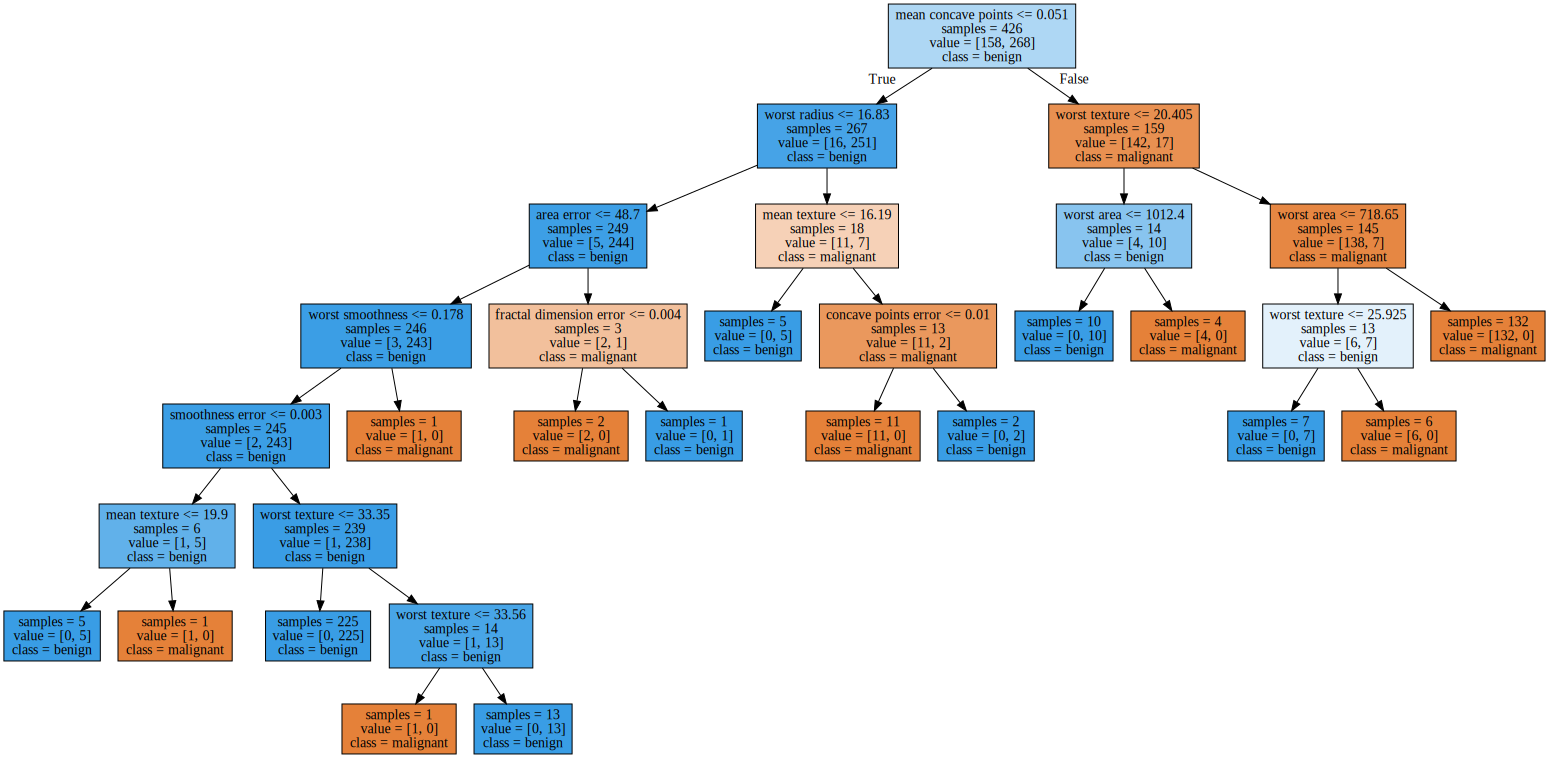

In [28]:
export_graphviz(cancer_tree,
                out_file="cancer_tree.dot",
                class_names=["malignant", "benign"],
                feature_names=cancer.feature_names,
                impurity=False, filled=True)

with open("cancer_tree.dot") as f:
    graph = f.read()

graphviz.Source(graph)